# STOCK MARKET PREDICT USING LSTM

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import warnings as wr
wr.filterwarnings("ignore")


In [4]:
from matplotlib import pyplot as plt

In [46]:
# APPLE STOCK DETAILS

In [5]:
df=pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Stock-MArket-Forecasting/master/AAPL.csv")

In [6]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [7]:
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.0500,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.1000,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.9000,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.0500,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.3200,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,AAPL,2020-05-18 00:00:00+00:00,314.960,316.500,310.3241,313.17,33843125,314.960000,316.500000,310.324100,313.170000,33843125,0.0,1.0
1254,AAPL,2020-05-19 00:00:00+00:00,313.140,318.520,313.0100,315.03,25432385,313.140000,318.520000,313.010000,315.030000,25432385,0.0,1.0
1255,AAPL,2020-05-20 00:00:00+00:00,319.230,319.520,316.2000,316.68,27876215,319.230000,319.520000,316.200000,316.680000,27876215,0.0,1.0
1256,AAPL,2020-05-21 00:00:00+00:00,316.850,320.890,315.8700,318.66,25672211,316.850000,320.890000,315.870000,318.660000,25672211,0.0,1.0


In [8]:
df1=df["open"]

In [9]:
df1

0       130.34
1       131.86
2       131.23
3       131.20
4       129.86
         ...  
1253    313.17
1254    315.03
1255    316.68
1256    318.66
1257    315.77
Name: open, Length: 1258, dtype: float64

In [10]:
df1=np.array(df["open"]).reshape(-1,1)

In [11]:
df1

array([[130.34],
       [131.86],
       [131.23],
       ...,
       [316.68],
       [318.66],
       [315.77]])

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
mm=MinMaxScaler(feature_range=(0,1))

In [14]:
df1=mm.fit_transform(df1)

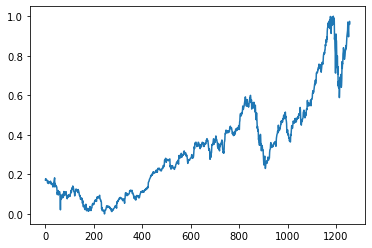

In [15]:
plt.plot(df1)

In [16]:
df1

array([[0.17185703],
       [0.17833255],
       [0.17564862],
       ...,
       [0.96570528],
       [0.9741405 ],
       [0.96182848]])

In [17]:
training_size=int(len(df1)*0.65)

In [18]:
test_size=len(df1)-training_size

In [19]:
train_data,test_data=df1[0:training_size],df1[training_size:len(df1)]

#  convert an array of values into a dataset matrix

In [20]:
training_size,test_size

(817, 441)

In [21]:
train_data

array([[0.17185703],
       [0.17833255],
       [0.17564862],
       [0.17552081],
       [0.16981212],
       [0.1732203 ],
       [0.16861926],
       [0.16827845],
       [0.16572232],
       [0.15634985],
       [0.16154731],
       [0.16691518],
       [0.16267627],
       [0.15379372],
       [0.15775572],
       [0.16069527],
       [0.15860776],
       [0.16065266],
       [0.15971542],
       [0.15967282],
       [0.15852256],
       [0.16555191],
       [0.16048226],
       [0.15106718],
       [0.15153581],
       [0.15720189],
       [0.15519959],
       [0.14885187],
       [0.15289908],
       [0.14689217],
       [0.14420824],
       [0.13607123],
       [0.14923529],
       [0.15353811],
       [0.15217484],
       [0.16078047],
       [0.16648916],
       [0.17454096],
       [0.18255016],
       [0.13628424],
       [0.15421974],
       [0.15047075],
       [0.14097048],
       [0.14220594],
       [0.14122609],
       [0.13769011],
       [0.13888297],
       [0.134

In [22]:
def creat_dataset(dataset,time_step=1):
    datax=[]
    datay=[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step)]
        datax.append(a)
        datay.append(dataset[i+time_step])
    return np.array(datax),np.array(datay)
    

In [23]:
time_step=100

In [24]:
x_train,y_train=creat_dataset(train_data,time_step)

In [25]:
print(x_train.shape), print(y_train.shape)

(716, 100, 1)
(716, 1)


(None, None)

In [26]:
x_test,y_test=creat_dataset(test_data,time_step)

In [27]:
x_test.shape , y_test.shape

((340, 100, 1), (340, 1))

In [28]:
from keras.models import Sequential
from keras.layers import *

In [29]:
model=Sequential()

In [30]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=["accuracy"])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [32]:
tf.__version__

'2.7.0'

In [34]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=54,verbose=1)

Epoch 1/100
14/14 [==============================] - 2s 111ms/step - loss: 5.6401e-04 - accuracy: 0.0014 - val_loss: 0.0044 - val_accuracy: 0.0029
Epoch 2/100
14/14 [==============================] - 2s 162ms/step - loss: 5.4296e-04 - accuracy: 0.0014 - val_loss: 0.0030 - val_accuracy: 0.0029
Epoch 3/100
14/14 [==============================] - 2s 149ms/step - loss: 5.2054e-04 - accuracy: 0.0014 - val_loss: 0.0036 - val_accuracy: 0.0029
Epoch 4/100
14/14 [==============================] - 2s 149ms/step - loss: 5.5130e-04 - accuracy: 0.0014 - val_loss: 0.0027 - val_accuracy: 0.0029
Epoch 5/100
14/14 [==============================] - 3s 215ms/step - loss: 5.1606e-04 - accuracy: 0.0014 - val_loss: 0.0027 - val_accuracy: 0.0029
Epoch 6/100
14/14 [==============================] - 2s 127ms/step - loss: 5.0897e-04 - accuracy: 0.0014 - val_loss: 0.0028 - val_accuracy: 0.0029
Epoch 7/100
14/14 [==============================] - 4s 263ms/step - loss: 4.7897e-04 - accuracy: 0.0014 - val_loss: 0

In [35]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [37]:
train_predict=mm.inverse_transform(train_predict)
test_predict=mm.inverse_transform(test_predict)

In [38]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

141.30252062089235

In [40]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

238.22982473615377

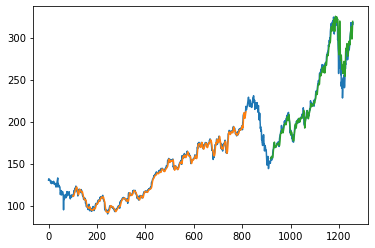

In [45]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(mm.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()